<div style="text-align:center">
    <h1>
        Value Iteration
    </h1>
</div>
<br>

<div style="text-align:center">
    <p>
        In this notebook we are going to look at a dynamic programming algorithm called value iteration. In it, we will sweep the state space and update all the V(s) values.
    </p>
</div>

<br><br>
<div style="text-align:center">
    <b>This notebook belongs to section 3 of the course "Reinforcement Learning: beginner to master".</b>
    <br><br>
    <a href="https://www.udemy.com">Reinforcement Learning: beginner to master</a> (English)
    <br>
    <a href="https://www.udemy.com">Reinforcement Learning: de principiante a maestro</a> (Spanish)
</div>

<br>

<table style="width:35%">
  <tr style="background-color: transparent">
    <td style="width: 45%">
        <a target="_parent" href="https://www.evlabs.io" style="float: center">
            <img src="img/evlabs-square.png" width="75"/>
        </a> 
    </td>
    <td valign="bottom">
        <a target="_parent" href="https://www.youtube.com/channel/UCksRNSzWuMV5IfdrPlglqqw">
            <img src="img/YouTube.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://www.linkedin.com/company/evlabs">
            <img src="img/LinkedIn.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://twitter.com/evelabs">
            <img src="img/Twitter.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://github.com/escape-velocity-labs/">
            <img src="img/GitHub.png" width="35"/>
        </a> 
    </td>

  </tr>
  <tr style="background-color: transparent">
    <th style="text-align: center; width: 70%">Escape Velocity Labs</th>
  </tr>

</table>

<br>

## Import the necessary software libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_values, test_agent

## Initialize the environment

In [2]:
env = Maze()

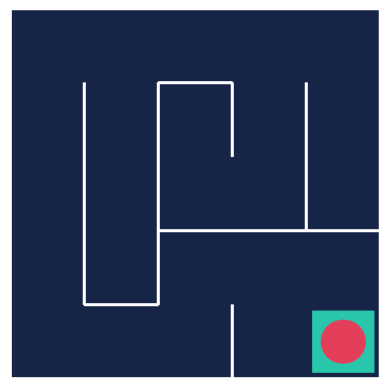

In [3]:
frame = env.render(mode="rgb_array")
plt.axis('off') # matplotlib library clears the axis from the image
plt.imshow(frame)

In [4]:
print(f"Observation frame shape: {env.observation_space.nvec}")
print(f"Number of available actions: {env.action_space.n}")

Observation frame shape: [5 5]
Number of available actions: 4


## Define the policy $\pi(\cdot|s)$

#### Create the policy $\pi(\cdot|s)$

In [5]:
# create a table that will contain the probabilities of the agent picking each action in each state.
policy_probs = np.full((5,5,4), 0.25) # 25 states with 4 possible actions, with 25% prob of being chosen
print(policy_probs)

[[[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]]


In [6]:
# the policy is a function that takes as input a state and returns the probabilities 
# of each action of being taken by the agent in that state.
# it is a random policy
def policy(state):
    return policy_probs[state]

#### Test the policy with state (0, 0)

In [7]:
action_probabilities = policy((0,0))
for action, prob in zip(range(4), action_probabilities):
    print(f"Probability of taking action {action}: {prob}")

Probability of taking action 0: 0.25
Probability of taking action 1: 0.25
Probability of taking action 2: 0.25
Probability of taking action 3: 0.25


#### See how the random policy does in the maze

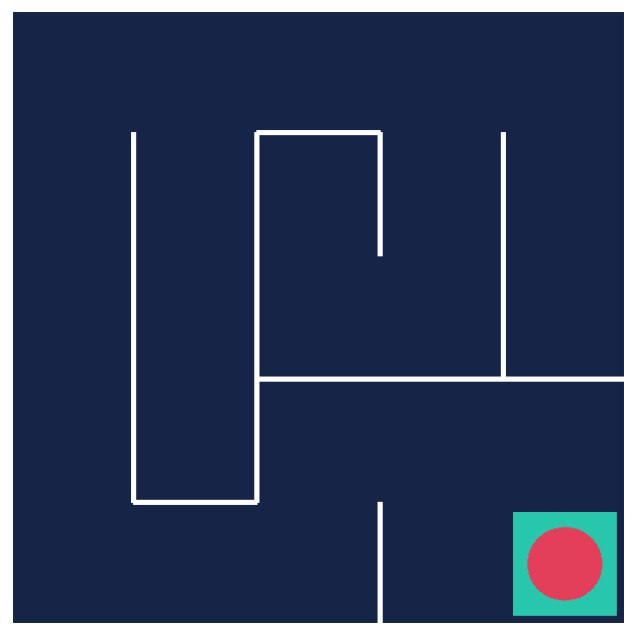

In [8]:
test_agent(env, policy, episodes=1)

#### Plot the policy

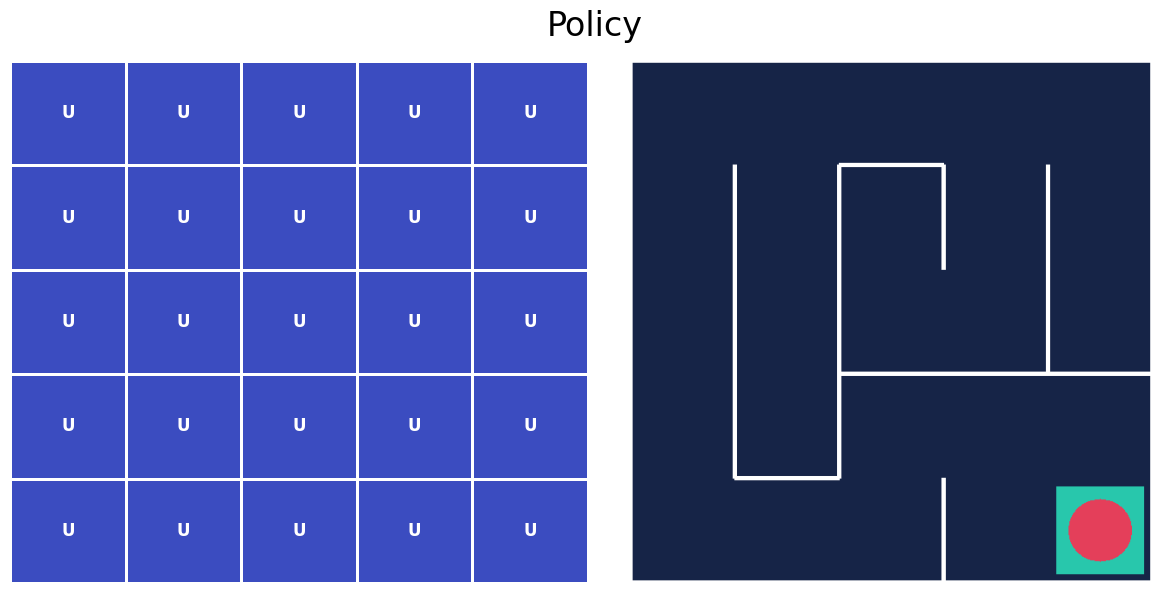

In [9]:
# Since the initial policy has the same probability to every action, the same action is displayed for
# every state.
plot_policy(policy_probs, frame)

## Define value table $V(s)$

#### Create the $V(s)$ table

In [10]:
state_values = np.zeros(shape=(5,5))

#### Plot $V(s)$

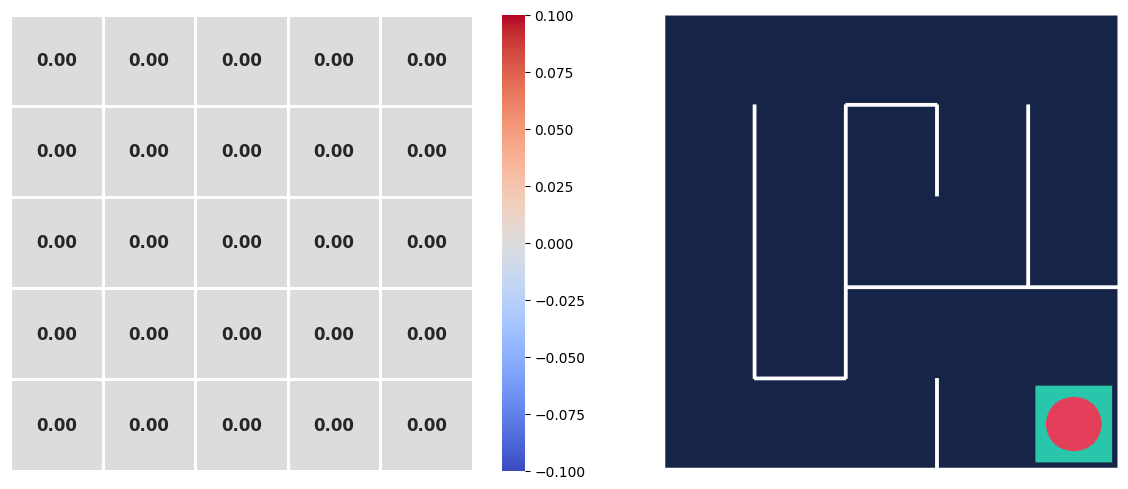

In [11]:
plot_values(state_values, frame)

## Implement the Value Iteration algorithm

</br>


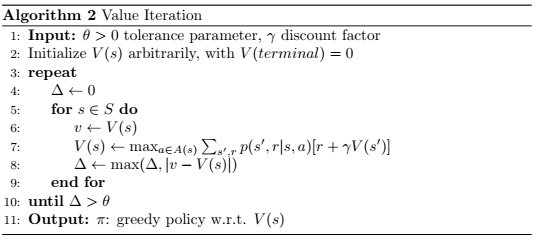

<div style="text-align:center">
    Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
</div>

Transitions between states are deterministic ($p(s', r| s, a) = 1$)

In [12]:
def value_iteration(policy_probs, state_values, theta=1e-6, gamma=0.99):
    delta = float("inf") # init. delta with a large value to enter the while loop
    
    while delta > theta:
        delta = 0
        
        for row in range(5):
            for col in range(5):
                old_value_estimate = state_values[(row,col)]
                action_probs = None
                max_qsa = float("-inf") # max q value pair
                
                for action in range(4): # for each action
                    next_state, reward, _, _ = env.simulate_step((row,col), action)
                    qsa = reward + gamma * state_values[next_state]
                    
                    if qsa > max_qsa:
                        max_qsa = qsa
                        action_probs = np.zeros(4)
                        action_probs[action] = 1.0 # we set the probability of the optimal action to 100%
                        
                # update the value estimate of the present state as the highest return obtained 
                # by the optimal action
                state_values[(row, col)] = max_qsa
                    
                # update the policy to have 100% probability of selecting this action in this state.
                policy_probs[(row, col)] = action_probs
                
                delta = max(delta, abs(old_value_estimate - state_values[(row, col)]))                    

In [13]:
value_iteration(policy_probs, state_values) 

## Show results

#### Show resulting value table $V(s)$

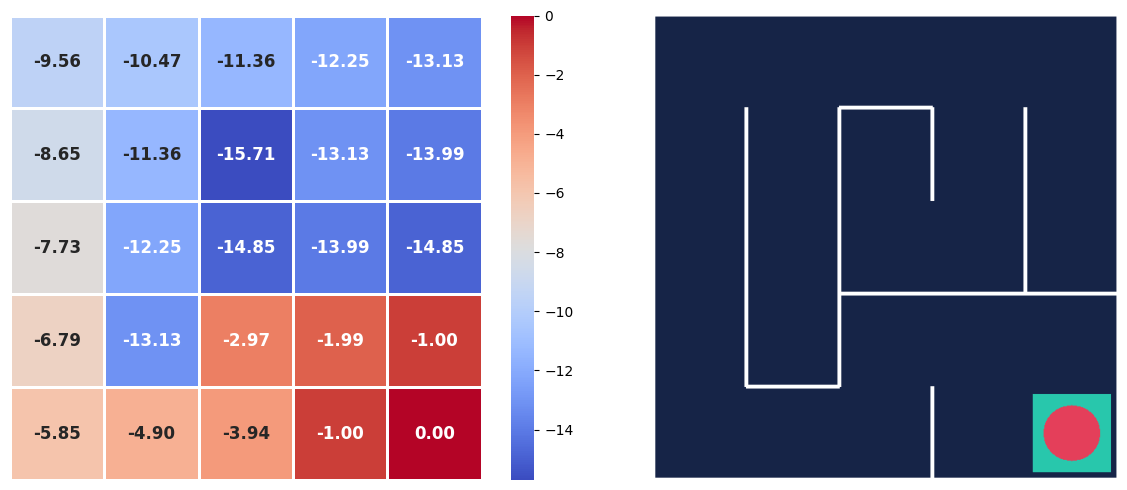

In [14]:
plot_values(state_values, frame)
# As you know, in this environment, every reward is -1 until the agent finds the exit. For that reason
# the closer we get to the goal, the higher the value of the state.
# And, of course, the value of the state where the goal is located is 0 because at that state we
# don't expect to obtain any extra reward.
# On the other hand, the farther away we move from the goal, the lower the value of the states, until
# the furthest state whose value is -15,71.
# Remember that these values are associated with the optimal policy, the value of a state is the return
# that we expect to obtain following the policy that it represents.
# As an example, if we start from the initial state and we take the optimal actions until we reach the
# goal, the return that we expect to obtain is -9,56, 
# which is the value of the initial state under the optimal policy.

#### Show resulting policy $\pi(\cdot|s)$

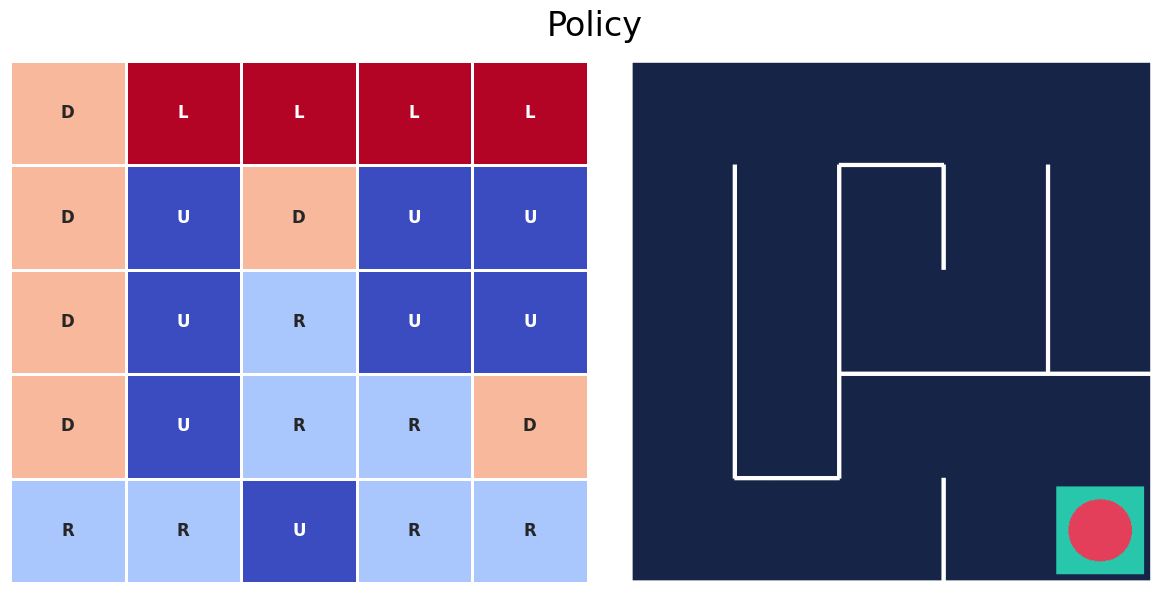

In [15]:
plot_policy(policy_probs, frame)
# Well, as you can see, starting at the initial state, the optimal actions involve going down, then 
# right then up and right again and then moving down to reach the goal. If we start at the furthest state
# possible these are the actions that the optimal policy prescribes
# which, as you can see, take us straight to the goal.

#### Test the resulting agent

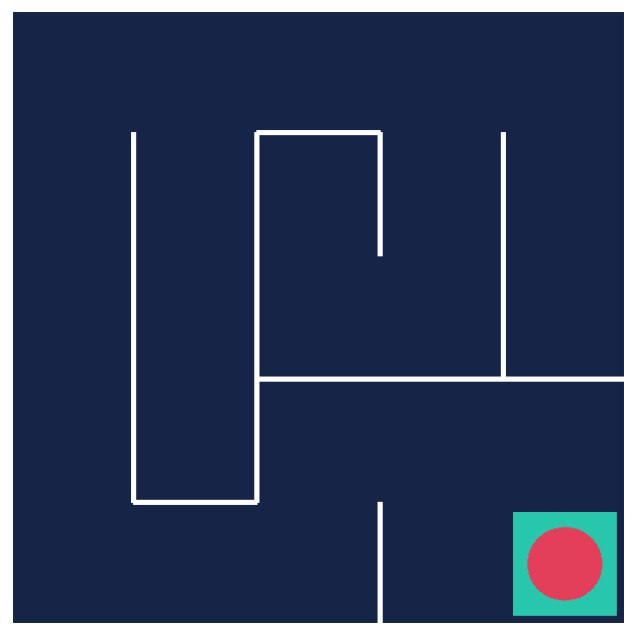

In [16]:
test_agent(env, policy) # this policy is actually the updated policy_probs table 
# that we get after running the value_iteration function

## Resources

[[1] Reinforcement Learning: An Introduction. Ch. 4: Dynamic Programming](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf)